In [14]:
## importation de google drive et récuperation des données

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
## recupération du zip et je le dezip

import os
import zipfile
local_zip = '/content/drive/MyDrive/archive_alien.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall(os.getcwd())
zip_ref.close()

In [16]:
## importation de ImageDataGenerator de tensorflow

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [17]:
## creation des variables qui vont contenir les chemins d'images

import os
  
base_dir = '/content/data'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')



# Directory with our training cat pictures
train_alien_dir = os.path.join(train_dir, 'alien')

# Directory with our training dog pictures
train_predator_dir = os.path.join(train_dir, 'predator')

# Directory with our validation cat pictures
validation_alien_dir = os.path.join(validation_dir, 'alien')

# Directory with our validation dog pictures
validation_predator_dir = os.path.join(validation_dir, 'predator')


train_alien_fnames = os.listdir(train_alien_dir)
print(train_alien_fnames[:10])

train_predator_fnames = os.listdir(train_predator_dir)
train_predator_fnames.sort()
print(train_predator_fnames[:10])

['321.jpg', '118.jpg', '228.jpg', '269.jpg', '152.jpg', '16.jpg', '295.jpg', '252.jpg', '231.jpg', '194.jpg']
['0.jpg', '1.jpg', '10.jpg', '100.jpg', '101.jpg', '102.jpg', '103.jpg', '104.jpg', '105.jpg', '106.jpg']


In [18]:
## je print pour voir si on a les données bien découpées 

print('total training cat images:', len(os.listdir(train_alien_dir)))
print('total training dog images:', len(os.listdir(train_predator_dir)))
print('total validation cat images:', len(os.listdir(validation_alien_dir)))
print('total validation dog images:', len(os.listdir(validation_predator_dir)))

total training cat images: 347
total training dog images: 347
total validation cat images: 100
total validation dog images: 100


In [19]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

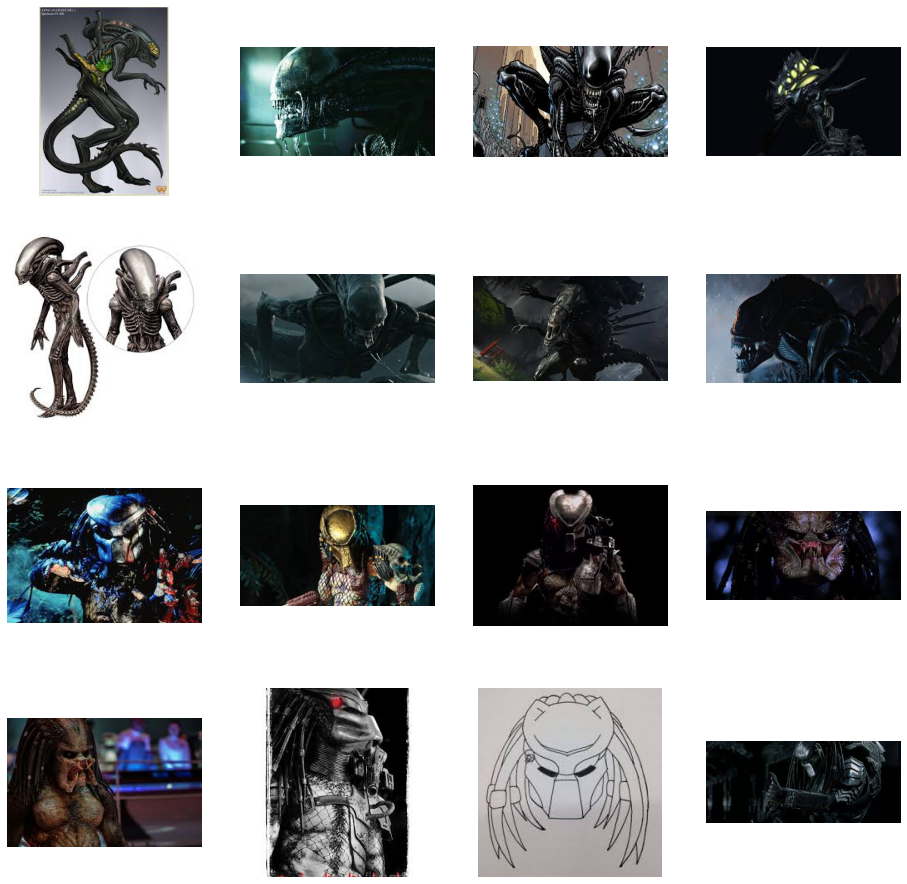

In [20]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join(train_alien_dir, fname) 
                for fname in train_alien_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_predator_dir, fname) 
                for fname in train_predator_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [21]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [22]:
# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(150, 150, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

In [23]:
# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(120, activation='relu')(x)
x = layers.Dropout(0.5)(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully 
# connected layer + sigmoid output layer
model = Model(img_input, output)

In [24]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        1849

In [25]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
val_datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 694 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [27]:
history = model.fit(
      train_generator,
      epochs=50,
      validation_data=validation_generator,
      verbose=1)

Epoch 1/50
22/22 [==============================] - 9s 276ms/step - loss: 32.0361 - acc: 0.5749 - val_loss: 0.6143 - val_acc: 0.6100
Epoch 2/50
22/22 [==============================] - 5s 245ms/step - loss: 0.6993 - acc: 0.6369 - val_loss: 0.7200 - val_acc: 0.6300
Epoch 3/50
22/22 [==============================] - 5s 243ms/step - loss: 0.7088 - acc: 0.5749 - val_loss: 0.7139 - val_acc: 0.6650
Epoch 4/50
22/22 [==============================] - 5s 241ms/step - loss: 0.9172 - acc: 0.5865 - val_loss: 0.6670 - val_acc: 0.6350
Epoch 5/50
22/22 [==============================] - 5s 242ms/step - loss: 0.6617 - acc: 0.6441 - val_loss: 0.6855 - val_acc: 0.6100
Epoch 6/50
22/22 [==============================] - 5s 239ms/step - loss: 0.7044 - acc: 0.6182 - val_loss: 0.6713 - val_acc: 0.6300
Epoch 7/50
22/22 [==============================] - 5s 239ms/step - loss: 0.7895 - acc: 0.6052 - val_loss: 0.6505 - val_acc: 0.6550
Epoch 8/50
22/22 [==============================] - 5s 241ms/step - loss: 0

1/1 [==============================] - 0s 174ms/step


<ipython-input-28-bab8b82851f8>:43: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


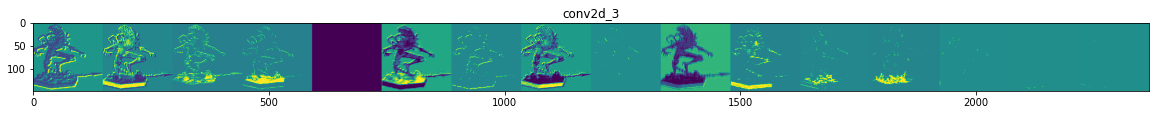

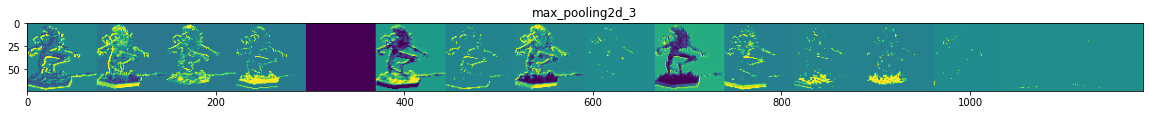

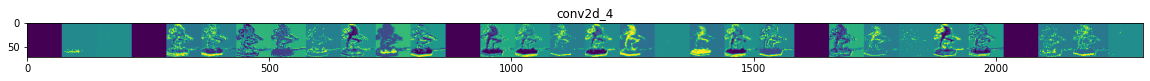

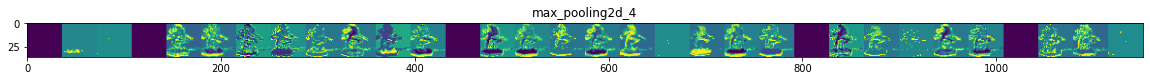

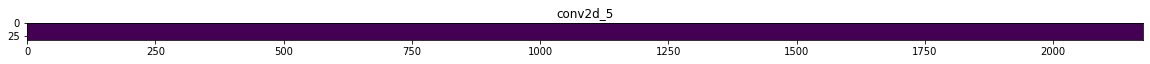

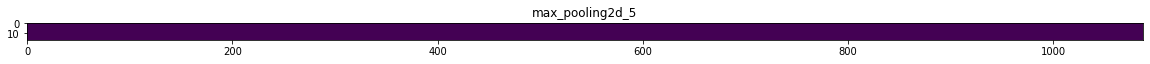

In [28]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = Model(img_input, successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
alien_img_files = [os.path.join(train_alien_dir, f) for f in train_alien_fnames]
predator_img_files = [os.path.join(train_predator_dir, f) for f in train_predator_fnames]
img_path = random.choice(alien_img_files + predator_img_files)

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

Text(0.5, 1.0, 'Training and validation loss')

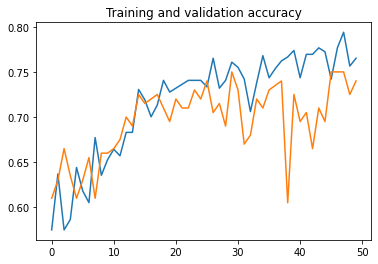

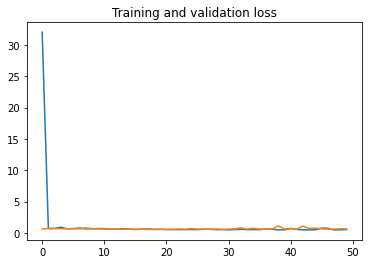

In [30]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')